## Read the feature selected  data frame via mutual information

In [1]:
import pandas as pd
import numpy as np
import time

np.random.seed(33)
# df = pd.read_csv("../data/featureSelectedAllDataWithY.csv")
df = pd.read_csv("../data/Cleaned_dat_encoded.csv")
print(df.shape)
df.head()

(534730, 584)


,dep_name,esi,age,gender,ethnicity,race,lang,religion,maritalstatus,employstatus,...,cc_vaginaldischarge,cc_vaginalpain,cc_weakness,cc_wheezing,cc_withdrawal-alcohol,cc_woundcheck,cc_woundinfection,cc_woundre-evaluation,cc_wristinjury,cc_wristpain
0,2,4,40,2,1,8,1,9,8,2,...,0,0,0,0,0,0,0,0,0,0
1,2,4,66,2,1,4,1,11,5,3,...,0,0,0,0,0,0,0,0,0,0
2,2,2,66,2,1,4,1,11,5,3,...,0,0,0,0,0,0,0,0,0,0
3,3,2,66,2,1,4,1,11,5,3,...,0,0,0,0,0,0,0,0,0,0
4,3,3,84,1,1,5,2,11,10,6,...,0,0,0,0,0,0,0,0,0,0


## Correlation analysis 

In [11]:
health_data = df.copy()

feature_corr = health_data.corr()
feature_corr[abs(feature_corr['disposition']) > 0.1]['disposition']

dep_name                        -0.114810
esi                              0.431877
age                             -0.374109
race                            -0.136434
employstatus                    -0.135497
                                   ...   
meds_unclassifieddrugproducts   -0.239354
meds_vitamins                   -0.348034
n_surgeries                     -0.207205
cc_alteredmentalstatus          -0.126320
cc_shortnessofbreath            -0.159733
Name: disposition, Length: 63, dtype: float64

In [15]:
print(feature_corr[abs(feature_corr['disposition']) > 0.2]['disposition'])
print(len(feature_corr[abs(feature_corr['disposition']) > 0.2]['disposition']))

esi                              0.431877
age                             -0.374109
disposition                      1.000000
htn                             -0.261439
meds_analgesics                 -0.338007
meds_antiarthritics             -0.205010
meds_antiasthmatics             -0.273278
meds_anticoagulants             -0.234132
meds_antihyperglycemics         -0.265112
meds_antiplateletdrugs          -0.333516
meds_cardiacdrugs               -0.308993
meds_cardiovascular             -0.441590
meds_cnsdrugs                   -0.249786
meds_diuretics                  -0.317732
meds_eentpreps                  -0.211058
meds_elect/caloric/h2o          -0.308729
meds_gastrointestinal           -0.390537
meds_hormones                   -0.207902
meds_psychotherapeuticdrugs     -0.323160
meds_thyroidpreps               -0.228913
meds_unclassifieddrugproducts   -0.239354
meds_vitamins                   -0.348034
n_surgeries                     -0.207205
Name: disposition, dtype: float64


## Read the feature selected columns for training

In [2]:
## Split the data into training and testing data
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(df, test_size=0.2, random_state=25)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 427784
No. of testing examples: 106946


In [3]:
y_train = training_data['disposition']
y_test = testing_data['disposition']
X_train = training_data.drop("disposition",axis = 1)
X_test = testing_data.drop("disposition",axis = 1)

y_train = np.array(y_train)
y_test = np.array(y_test)
X_train = np.array(X_train)
X_test = np.array(X_test)
# y_train = np.array(y_train)[:100]
# y_test = np.array(y_test)[:10]
# X_train = np.array(X_train)[:100,]
# X_test = np.array(X_test)[:10,]

Logistic Regression

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
# Predicting the test set

y_pred = clf.predict(X_test)
# Making Confusion Matrix and calculating accuracy score

mylist = []
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

/Users/yuxuan/opt/anaconda3/envs/dp3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[21313 11522]
 [ 4533 69578]]
0.8498775082752044


## Visualize the feature importance function


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
def feature_plot(classifier, feature_names, top_features=10):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    middle_coefficient = np.argsort(coef)[top_features]
    top_coefficients = np.hstack([top_negative_coefficients, middle_coefficient, top_positive_coefficients])
    plt.figure(figsize=(18, 7))
    colors = ['green' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features+1), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(2 * top_features+1), feature_names[top_coefficients], rotation=45, ha='right')

    plt.show()

## Feature importance in Logistic regression

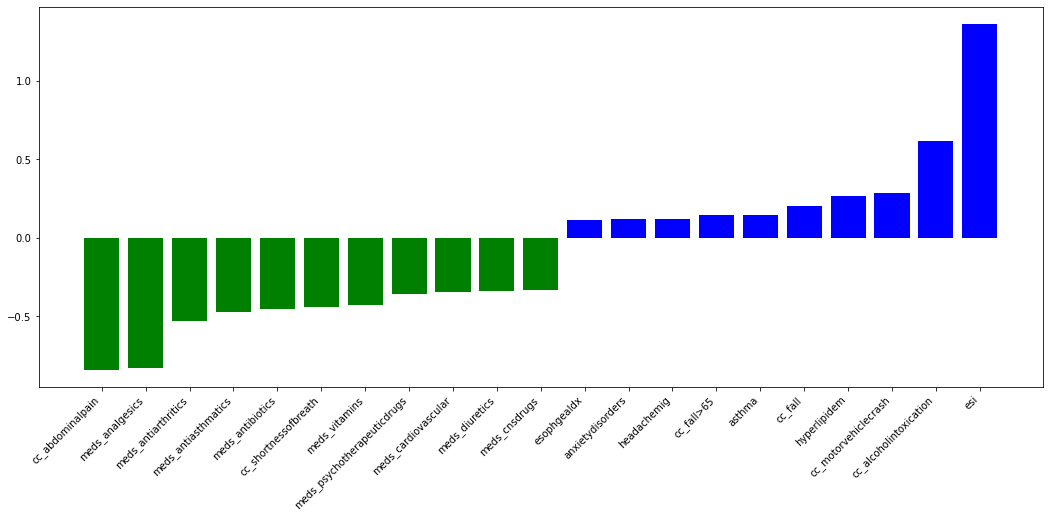

In [6]:
health_data = df.copy()
feature_plot(clf, health_data.drop(['disposition'], axis=1).columns.values)

## Learning curve

In [16]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

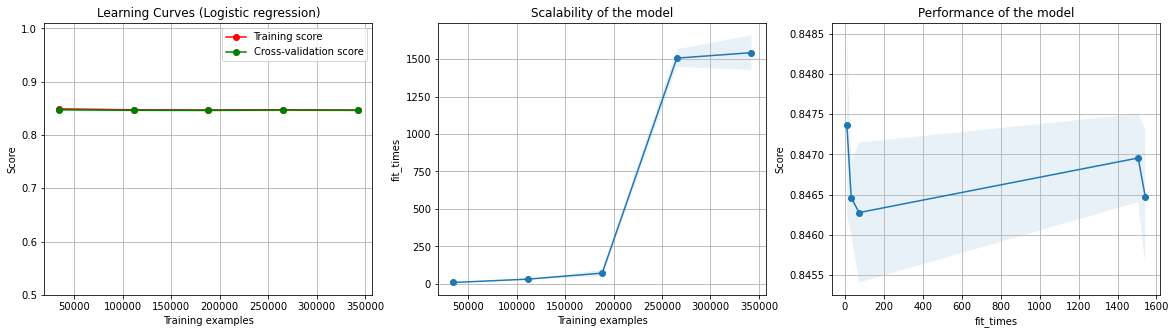

In [19]:
health_data = df.copy()

title = "Learning Curves (Logistic regression)"
# cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

plot_learning_curve(clf, title, X_train, y_train, ylim=(0.5, 1.01),
                     n_jobs=10)

plt.show()

# XGBoost

In [7]:
# from sklearn.svm import SVC
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# sv_clf = SVC(kernel="linear",random_state=1)
# sv_clf.fit(X_train, y_train)
#
# from sklearn.metrics import accuracy_score
# sv_clf_pred = sv_clf.predict(X_test)
# sv_clf_acc = accuracy_score(y_test,sv_clf_pred)
#
# sc_clf_acc_format = round(sv_clf_acc*100,2)
# print("Accuracy of linear SVM model", sc_clf_acc_format)
#